# Clasificación de textos usando Naive Bayes

Este clasificador no considera la relación entre las palabras. Este clasificador ingenuo considera simultáneamente todas las características.

## Definición del problema

Este proyecto es un clasificador de mensajes de texto, debe permitir determinar si un mensje es válido o spam. Este es un problema típico de minería de texto. Desde el punto de vista de un negocio, la recepción de publicidad no deseada y mensajes fraudulentos es un problema que afecta a los usuarios; y es por ello, que las compañias desean filtrar este tipo de mensajes con el fin de evitar el consumo de espacio en su infraestrructura y la molestia para el usuario.

Se tiene una muestra conformada por los siguientes mensajes:

|#| Tipo|    Mensaje| 
|--|:------:|-------------:|
|1 |  spam  |  w1 w3       |
|2 |  spam  |  w1 w2 w1 w3 |
|3 |  ham   |  w2 w4       |
|4 |  ham   |  w4 w5 w2    |
|5 |  ham   |  w2 w4 w2    |

Este modelo supone que algunas palabras son más frecuentes según el tipo de mensaje.

## Probabilidad

Se sabe que si $X_i$ es una variable aleatoria:

- su probabilidad de ocurrencia esta entre 0 y 1:
$$ 0 \leq Pr(X_i) \leq 1$$

- las probabilidades de los eventos mutuamente excluyentes deben sumar la unidad:
$$ \sum_{i=1}^n Pr(X_i) = 1 $$

- esto se puede escribir como:
$$ X_i = \left(X_1, X_2, X_3, ... X_n \right) $$
$$ Pr(X_1) + Pr(X_2) + Pr(X_3) + ... + Pr(X_n) = 1 $$

## Probabilidad conjunta

Es la probabilidad de que dos eventos ocurran simultaneamente, es decir:
$$ Pr(X_1 \: and \: X_2) $$ 

## Probabilidad condicional

Es la probabilidad de que ocurra un evento sabiendo que otro ya ocurrio, es decir:
$$ Pr(X_2 | X_1) = Pr(X_1 \: and \: X_2)/Pr(X_1)$$

En otras palabras,
$$ Pr(A|B) * Pr(B) = Pr(A\: and \: B) $$

para dos eventos A y B.

## Independencia

Si los eventos son independientes, la probabilidad condicional del evento A dado que ocurrio el evento B es igual a la probabilidad del evento A, es decir:
$$ Pr(A|B) = Pr(A) $$

De la definición de probabilidad condicional:
$$ Pr(A|B) = Pr(A) = \frac{Pr(A \: and \: B)}{Pr(B)} $$

Entonces, para eventos independientes:
$$ Pr(A\:and\:B) = Pr(A) * Pr(B) $$

## Probabilidad marginal

Para un conjunto de eventos mutuamente exclusivos y colectivamente exhaustivos. La probabilidad de un evento A es:
$$ Pr(A) = \sum_{i=1}^{n}{Pr(A\:and\:X_i)} $$

# Unión 

Para dos eventos A y B:
$$ Pr(A\:or\:B) = Pr(A) +Pr(B) - Pr(A\:and\:B) $$

## Complemento
$$ Pr(\sim A) = 1-Pr(A) $$

## Probabilidad total
$$ Pr(A)=Pr(A\:and\:B) + Pr(A\:and\:\sim B) $$

Esto puede expresarse como:
$$ Pr(A)=Pr(A|B) Pr(B) +Pr(A|\sim B)Pr(\sim B) $$

## Teorema de Bayes

A partir de las definiciones anteriores:
$$ Pr(B|A) = \frac{Pr(A|B)Pr(B)}{Pr(A)} = \frac{Pr(A|B)Pr(B)}{Pr(A|B)Pr(B)+Pr(A|\sim B)Pr(\sim B)} $$

# Planteamiento del problema

En este problema existen dos posibles eventos; que un correo sea "Spam" (o 1) y por otro lado "No Spam" (o 0), dos eventos que son mutuamente excluyentes y colectivamente exhaustivos. Dado que el analisis se realizara por las palabras que el mensaje contenga $w_n = (w_1, w_2, w_3 ... w_n)$. La probabilidad de que un mensaje sea "Spam" dado que contiene la palabra $w_1$ es:
$$ Pr(Spam|w_1) = \frac{Pr(w_1|Spam)*Pr(Spam)}{Pr(w_1)} $$

donde:
- $ Pr(Spam | w_1) $ es la probabilidad posterior.
- $ Pr(w_1|Spam) $ es la verosilimitud.
- $ Pr(Spam) $ es la probabilidad prior.
- $ Pr(w_1) $ es la verosilimitud marginal.

de aquí y en aplicación de las ecuaciones anteriores podemos entender y crear un clasificador en Pyton:


In [1]:
# Importamos las líbrerias
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB


In [2]:
# Cargamos el dataset y lo mostramos
data = pd.read_csv(
    "C:/Users/crisd/OneDrive/Escritorio/libros/project/spam_or_not_spam.csv")

# Eliminamos los mensajes vacios o no clasificados
data = data.dropna()
data.head()


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
# Revisamos el dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


In [4]:
# Mostramos el texto de los mensajes
data.email


0        date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...
1       martin a posted tassos papadopoulos the greek ...
2       man threatens explosion in moscow thursday aug...
3       klez the virus that won t die already the most...
4        in adding cream to spaghetti carbonara which ...
                              ...                        
2995     abc s good morning america ranks it the NUMBE...
2996     hyperlink hyperlink hyperlink let mortgage le...
2997     thank you for shopping with us gifts for all ...
2998     the famous ebay marketing e course learn to s...
2999     hello this is chinese traditional 子 件 NUMBER世...
Name: email, Length: 2999, dtype: object

In [5]:
# Mostramos las categorías de los mensajes
data.label.value_counts()


0    2500
1     499
Name: label, dtype: int64

In [6]:
# Creamos el vector de palabras
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(data.email)
X.shape


(2999, 34116)

In [7]:
# Vamos a aplicar sobre muestreo; debido a que el dataset es desbalanceado
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, data.label)
X_res.shape


(5000, 34116)

In [8]:
# Ahora las clases son balanceadas
y_res.value_counts()


0    2500
1    2500
Name: label, dtype: int64

In [13]:
# Separamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, shuffle=True)

# Creamos el modelo y lo entrenamos
model = BernoulliNB(alpha=0.1)
model.fit(X_train, y_train)

BernoulliNB(alpha=0.1)

In [15]:
# Predecimos
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print(acc)

0.908


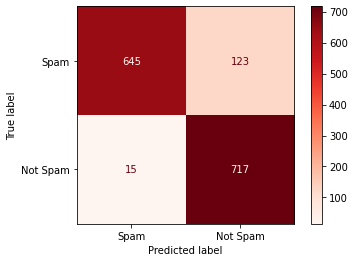

In [16]:
# Creamos la matriz de confusión
cm = confusion_matrix(y_test, pred)
cmd= ConfusionMatrixDisplay(cm, display_labels=['Spam', 'Not Spam'])
cmd.plot(cmap='Reds');

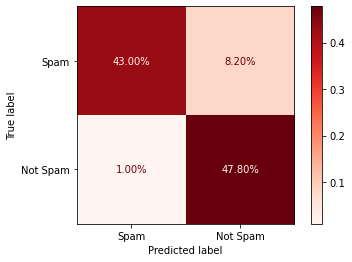

In [17]:
# Matriz de confusión en porcentajes
cm_p = confusion_matrix(y_test, pred, normalize='all')
cmd_p = ConfusionMatrixDisplay(cm_p, display_labels=['Spam', 'Not Spam'])
cmd_p.plot(cmap='Reds', values_format='.2%');

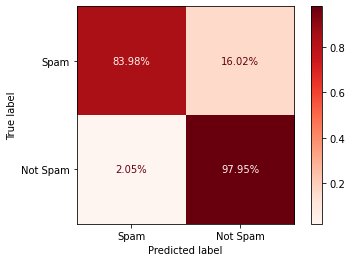

In [19]:
# Matriz de confusión en porcentajes por predicción
cm_p = confusion_matrix(y_test, pred, normalize='true')
cmd_p = ConfusionMatrixDisplay(cm_p, display_labels=['Spam', 'Not Spam'])
cmd_p.plot(cmap='Reds', values_format='.2%');

## Resultados:

Como se puede observar el modelo puede detectar correctamente un 83.98% de los mensajes de Spam y un 97.95% de los mensajes No Spam, esto quiere decir que el modelo reconoce correctamente un 90.8% de los mensajes.